In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from FBSNNs import *
from CallOptionsBasket import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 512  # number of trajectories (batch size)
N = 200  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1] * int(D))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
model = CallOptionsBasket(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [4]:
model.load_model("models/100DCallOptionXVAPaper.pth")

In [5]:
np.random.seed(37)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(15):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)


In [6]:
Y_pred = Y_pred * 100

In [7]:
graph = model.iteration, model.training_loss

In [8]:
def figsize(scale, nplots = 1):
    fig_width_pt = 438.17227                        
    inches_per_pt = 1.0/72.27                       
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            
    fig_width = fig_width_pt*inches_per_pt*scale    
    fig_height = nplots*fig_width*golden_mean             
    fig_size = [fig_width,fig_height]
    return fig_size

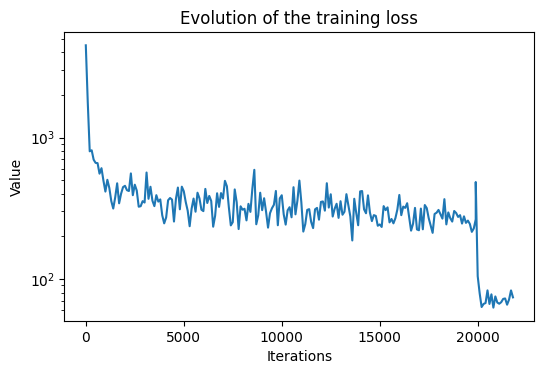

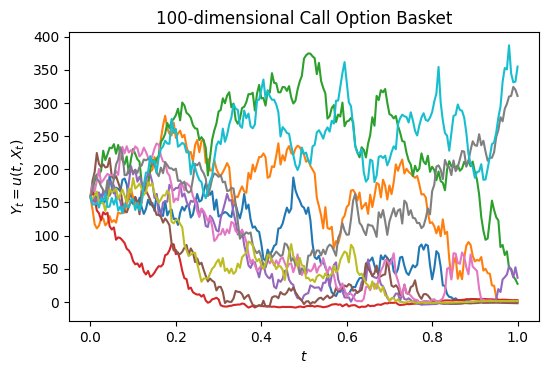

In [9]:
plt.figure(figsize=figsize(1.0))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
samples = 10
plt.savefig('Figures/100DCallOptionBasketLoss.pdf')
plt.figure(figsize=figsize(1.0))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T)


plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T)

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Call Option Basket')
plt.savefig('Figures/100DCallOptionBasketPreds.pdf')
plt.show()

In [10]:
Y_pred.shape

(8192, 201, 1)

In [11]:
Y_preds = Y_pred.reshape(8192, 201)

In [12]:
time_stamps = t_test[0].reshape(201,)
time_stamps

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625,
       0.63 , 0.635,

In [13]:
Y_preds[:,0][:,None]

array([[158.00461],
       [158.00461],
       [158.00461],
       ...,
       [158.00461],
       [158.00461],
       [158.00461]], dtype=float32)

In [14]:
Y_preds

array([[ 1.5800461e+02,  1.6513387e+02,  1.6266872e+02, ...,
         9.8529458e-01,  8.3297342e-01,  5.3102374e-01],
       [ 1.5800461e+02,  1.3924591e+02,  1.1725366e+02, ...,
         7.0054084e-01,  3.2879114e-01,  4.0182173e-01],
       [ 1.5800461e+02,  1.7027063e+02,  1.8187444e+02, ...,
         3.8554226e+01,  3.3994633e+01,  2.7436913e+01],
       ...,
       [ 1.5800461e+02,  1.2692545e+02,  1.1935134e+02, ...,
         1.9011520e+02,  1.6434944e+02,  1.4824835e+02],
       [ 1.5800461e+02,  1.5657404e+02,  1.3377769e+02, ...,
         1.7727985e+00,  1.6202793e+00,  1.6625032e+00],
       [ 1.5800461e+02,  1.8249231e+02,  1.7910306e+02, ...,
        -3.5464764e-04, -9.0955198e-02, -1.5126616e-01]], dtype=float32)

In [15]:
r = 0.01

In [16]:
epe = np.mean(np.exp(-r*time_stamps) * np.maximum(Y_preds,0),axis=0)    
epe

array([158.00061, 158.15735, 158.4157 , 158.33043, 158.54292, 158.64218,
       158.53392, 158.7262 , 158.73216, 158.71646, 158.77032, 158.61145,
       158.70206, 158.78493, 158.82764, 158.71011, 158.81151, 158.8553 ,
       159.0779 , 159.05794, 159.20035, 159.03778, 158.67856, 158.56589,
       158.77737, 158.92986, 158.91362, 159.0899 , 159.17569, 159.09273,
       158.9488 , 159.09221, 158.86438, 158.70642, 158.59863, 158.79025,
       158.75583, 158.72153, 158.73073, 158.51201, 158.62086, 158.51154,
       158.31271, 158.22452, 158.14473, 158.41617, 158.4594 , 158.5264 ,
       158.26607, 158.35431, 158.46248, 158.49167, 158.35318, 158.55103,
       158.60458, 158.56516, 158.6741 , 158.63217, 158.48286, 158.39114,
       158.37636, 158.42989, 158.29709, 158.62611, 158.77919, 158.55048,
       158.60358, 158.36885, 158.42409, 158.50914, 158.5015 , 158.45341,
       158.51768, 158.49002, 158.54044, 158.32161, 158.37857, 158.29053,
       158.0864 , 158.19676, 158.1486 , 158.12679, 

In [17]:
ene = np.mean(np.exp(-r*time_stamps) * np.minimum(Y_preds,0),axis=0)    
ene

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.30876915e-05,  0.00000000e+00, -5.09949314e-05,
       -2.05709366e-05,  0.00000000e+00,  0.00000000e+00, -2.12927072e-04,
       -2.86465161e-04, -6.43288717e-04, -1.19818095e-03, -2.01097107e-03,
       -2.59398739e-03, -

In [18]:
from scipy.stats import multivariate_normal as normal

dw_sample = normal.rvs(size=[50000, D, N]) * np.sqrt(T/N)
x_sample = np.zeros([50000, D, N + 1]) 
x_sample[:, :, 0] = np.ones([50000, D]) * 100
factor = np.exp((0.01-(0.25**2)/2)*(T/N))
for i in range(N):   
    x_sample[:, :, i + 1] = (factor * np.exp(0.25 * dw_sample[:, :, i])) * x_sample[:, :, i]

In [19]:
np.random.seed(37)
dw_sample1 = normal.rvs(size=[50000, D, N]) * np.sqrt(T/N)
x_sample1 = np.zeros([50000, D, N + 1]) 
x_sample1[:, :, 0] = np.ones([50000, D]) * 100
factor = np.exp((0.01-(0.25**2)/2)*(T/N))
for i in range(N):   
    x_sample1[:, :, i + 1] = (factor * np.exp(0.25 * dw_sample1[:, :, i])) * x_sample1[:, :, i]

In [20]:
portfolio1 = np.sum(x_sample, axis=1, keepdims=True)
portfolio2 = np.sum(x_sample1, axis=1, keepdims=True)

In [21]:
payoff1 = np.maximum(portfolio1 - 100 * 100, 0)
payoff2 = np.maximum(portfolio2 - 100 * 100, 0)

In [22]:
average_1 = np.mean(payoff1, axis=0, keepdims=True)
average_2 = np.mean(payoff2, axis=0, keepdims=True)

In [23]:
average = (average_1 + average_2)/ 2

In [24]:
mc_price = np.exp(-0.01 * 1) * average[:, :, 200]

In [25]:
mc_price

array([[158.37586814]])

In [26]:
epe_exact = np.array([mc_price[0][0] for _ in time_stamps])
ene_exact = np.array([0.0 for _ in time_stamps])

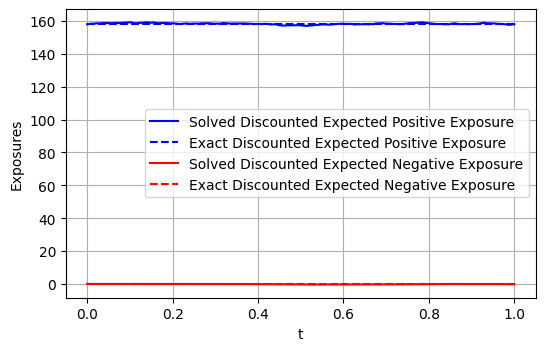

In [27]:
fig = plt.figure(figsize=figsize(1.0))
plt.plot(time_stamps,np.transpose(epe),'b',label='Solved Discounted Expected Positive Exposure' )
plt.plot(time_stamps,epe_exact,'b--',label='Exact Discounted Expected Positive Exposure')
plt.plot(time_stamps,np.transpose(ene),'r',label='Solved Discounted Expected Negative Exposure')
plt.plot(time_stamps,ene_exact,'r--',label='Exact Discounted Expected Negative Exposure')

plt.xlabel('t')
plt.ylabel('Exposures')
plt.grid()
plt.legend()
plt.savefig('Figures/100DCallOptionBasketExposures.pdf')

plt.show()

In [28]:
np.max(np.abs(epe - epe_exact)), np.max(np.abs(ene - ene_exact))

(1.3727248296971197, 0.41053158044815063)

In [29]:
np.std(np.abs(epe_exact- epe)), np.std(np.abs(ene_exact - ene))

(0.2904268891164224, 0.14027422551419585)

In [30]:
np.sqrt(np.mean((epe_exact - epe)**2 / epe_exact ** 2))

0.002904056888372371

In [31]:
var = np.abs(np.quantile((Y_preds - Y_preds[:,0][:,None]), 0.05, axis=0))

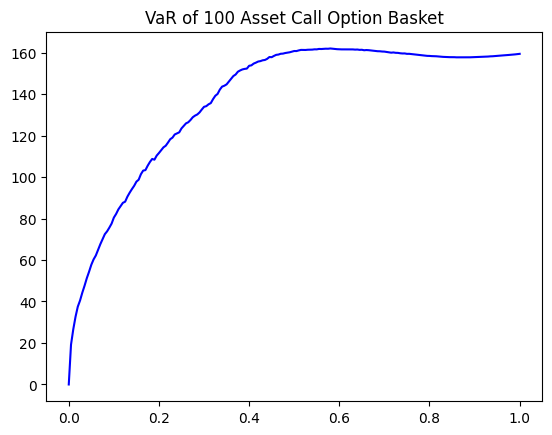

In [32]:
plt.title('VaR of 100 Asset Call Option Basket')
plt.plot(time_stamps,var,'b',label='VaR')
plt.show()

In [33]:
rate = 0.01
R_C = 0.3
R_B = 0.4
collateral = 0
intensityC = 0.1
intensityB = 0.01

In [34]:
Y_preds

array([[ 1.5800461e+02,  1.6513387e+02,  1.6266872e+02, ...,
         9.8529458e-01,  8.3297342e-01,  5.3102374e-01],
       [ 1.5800461e+02,  1.3924591e+02,  1.1725366e+02, ...,
         7.0054084e-01,  3.2879114e-01,  4.0182173e-01],
       [ 1.5800461e+02,  1.7027063e+02,  1.8187444e+02, ...,
         3.8554226e+01,  3.3994633e+01,  2.7436913e+01],
       ...,
       [ 1.5800461e+02,  1.2692545e+02,  1.1935134e+02, ...,
         1.9011520e+02,  1.6434944e+02,  1.4824835e+02],
       [ 1.5800461e+02,  1.5657404e+02,  1.3377769e+02, ...,
         1.7727985e+00,  1.6202793e+00,  1.6625032e+00],
       [ 1.5800461e+02,  1.8249231e+02,  1.7910306e+02, ...,
        -3.5464764e-04, -9.0955198e-02, -1.5126616e-01]], dtype=float32)

In [35]:
discount = np.exp(-(rate+intensityB+intensityC)*np.linspace(0,T,N+1))

In [36]:
phi_cva = (1-R_C)*discount*np.maximum(-Y_preds,0)*intensityC

In [37]:
phi_dva = (1-R_B)*discount*np.maximum(Y_preds,0)*intensityB

In [38]:
dva = np.sum(phi_dva.reshape(8192,1,201), axis=-1) - (phi_dva.reshape(8192,1,201)[:,:,-1] + phi_dva.reshape(8192,1,201)[:,:,0])/2

In [39]:
dva

array([[102.39203842],
       [177.79119011],
       [276.40516251],
       ...,
       [205.02795819],
       [163.30097774],
       [223.506726  ]])

In [40]:
dva[:,0] * T/N

array([0.51196019, 0.88895595, 1.38202581, ..., 1.02513979, 0.81650489,
       1.11753363])

In [41]:
dva_pred = np.mean(dva[:,0] * T/N)
dva_pred

0.8994691817071025

In [42]:
dva_exact = np.sum(epe_exact * intensityB * discount) * (1-R_B) * T/N
dva_exact

0.8999363669897525

In [43]:
np.mean((dva_exact - dva_pred)**2 / dva_exact ** 2) 

2.694974757008113e-07

In [44]:
model.save_model("models/100DCallOptionXVAPaper.pth")